# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
# Inspect the shapes

print("X_train shape:", X_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)
print("X_test shape:", X_test.shape)     # (10000, 28, 28)
print("y_test shape:", y_test.shape)     # (10000,)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot format
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Optional: check shape
print("y_train_onehot shape:", y_train_onehot.shape)  # (60000, 10)
print("y_test_onehot shape:", y_test_onehot.shape)    # (10000, 10)

y_train_onehot shape: (60000, 10)
y_test_onehot shape: (10000, 10)


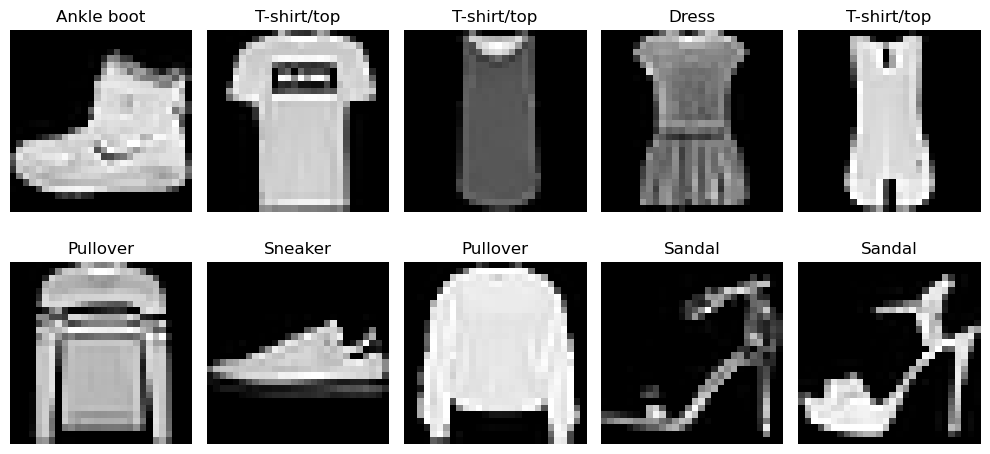

In [4]:
import matplotlib.pyplot as plt
# Verify the data looks as expected
# let check the data visually 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):                           # 10 classes/ categories
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()



Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

# One-hot encode labels
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten 2D image to 1D vector
model.add(Dense(10))                      # Linear output layer with 10 units (no activation)

# Compile the model using `model.compile()`
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train, y_train_onehot,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, y_test_onehot))

# # Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2091 - loss: 9.9438 - val_accuracy: 0.2099 - val_loss: 9.9988
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.2062 - loss: 9.0123 - val_accuracy: 0.1776 - val_loss: 9.9528
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.2259 - loss: 8.5040 - val_accuracy: 0.1945 - val_loss: 8.7223
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1634 - loss: 8.2695 - val_accuracy: 0.1323 - val_loss: 8.8945
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1481 - loss: 8.8425 - val_accuracy: 0.1995 - val_loss: 9.3076
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1988 - loss: 8.1463 - val_accuracy: 0.1950 - val_loss: 7.3930
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1947 - loss: 7.9567 - val_accuracy: 0.1946 - val_loss: 8.1673
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1907 - loss: 8.162

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

We can see that our test accuracy is 18.68%, very low and  Test Loss is 7.41, which is very high.  
We are using a single Dense layer with no activation, which is equivalent to linear regression.
Maybe Fashion MNIST dataset contains complex patterns (textures, shapes, edges) that require nonlinear modeling.


# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [ ]:
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train_onehot,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, y_test_onehot))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 52ms/step - accuracy: 0.8189 - loss: 0.5071 - val_accuracy: 0.8858 - val_loss: 0.3101
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 106s 57ms/step - accuracy: 0.9090 - loss: 0.2546 - val_accuracy: 0.8943 - val_loss: 0.2839
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 58ms/step - accuracy: 0.9283 - loss: 0.1937 - val_accuracy: 0.8968 - val_loss: 0.2996
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 73ms/step - accuracy: 0.9453 - loss: 0.1483 - val_accuracy: 0.8957 - val_loss: 0.3067
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 67ms/step - accuracy: 0.9569 - loss: 0.1155 - val_accuracy: 0.9063 - val_loss: 0.3063
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.9686 - loss: 0.0892 - val_accuracy: 0.9034 - val_loss: 0.3328
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.9741 - loss: 0.0701 - val_accuracy: 0.9029 - val_loss: 0.3725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 

Reflection: We can see that our test accuracy is 18.68%, very low and  Test Loss is 7.41, which is very high.

1 : Did the CNN model perform better than the baseline model? 

Yes, significantly. Our CNN model achieved a test accuracy of 90.45%, while the baseline linear model only reached 18.68%. And the CNN model has Test Loss of 0.45 compare to the baseline model with a Test Loss of 7.41. That’s a dramatic improvement in classification performance.

2: If so, by how much? 

 Improvement: 71.77% percentage points
      Baseline Accuracy: ~18.68%
      CNN Accuracy: ~90.45%
      Difference: 90.45% − 18.68% = 68.7%        ( 90.45/18.68 = 4.84 )
This shows that the CNN model is over 4 times more accurate than the baseline.

3: What do you think contributed to this improvement?

CNN model has more power to deal with the complexity of relationship and partens in the datset between the data point , also with the help of activation functions than the base model.  

**Your answer here**

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [ ]:
# A. Test Hyperparameters

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Prepare data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Experiment settings
filter_options = [32, 64, 128]
use_dropout_options = [False, True]
results = []

# Run experiments
for filters in filter_options:
    for use_dropout in use_dropout_options:
        print(f"\nTraining model with {filters} filters, Dropout={use_dropout}")
        
        # Build model
        model = Sequential()
        model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        if use_dropout:
            model.add(Dropout(0.3))
        model.add(Dense(10, activation='softmax'))

        # Compile and train
        model.compile(optimizer=Adam(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
        model.fit(X_train, y_train_onehot,
                  epochs=5,
                  batch_size=32,
                  verbose=0,
                  validation_data=(X_test, y_test_onehot))

        # Evaluate
        test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
        results.append({
            'filters': filters,
            'dropout': use_dropout,
            'accuracy': test_accuracy,
            'loss': test_loss
        })





Training model with 32 filters, Dropout=False

Training model with 32 filters, Dropout=True

Training model with 64 filters, Dropout=False

Training model with 64 filters, Dropout=True

Training model with 128 filters, Dropout=False

Training model with 128 filters, Dropout=True


In [19]:
print(f"{'Filters':<10} {'Dropout':<10} {'Test Accuracy':<15} {'Test Loss':<10}")
print("-" * 50)

# Print each result
for r in results:
    print(f"{r['filters']:<10} {str(r['dropout']):<10} {r['accuracy']*100:>12.2f}% {r['loss']:<10.4f}")



Filters    Dropout    Test Accuracy   Test Loss 
--------------------------------------------------
32         False             90.68% 0.2602    
32         True              91.17% 0.2455    
64         False             91.57% 0.2456    
64         True              91.02% 0.2487    
128        False             90.76% 0.2941    
128        True              91.47% 0.2446    


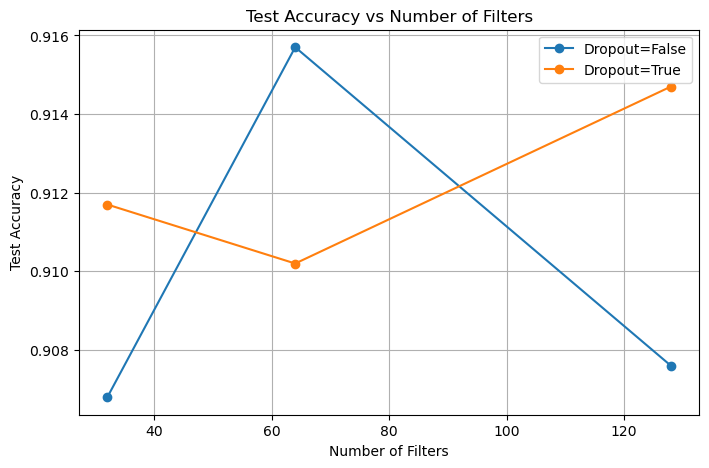

In [20]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
for use_dropout in use_dropout_options:
    accs = [r['accuracy'] for r in results if r['dropout'] == use_dropout]
    plt.plot(filter_options, accs, marker='o', label=f'Dropout={use_dropout}')
plt.title('Test Accuracy vs Number of Filters')
plt.xlabel('Number of Filters')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [14]:
# B. Test presence or absence of regularization

Dropout proved to be beneficial in improving model performance and preventing overfitting in general.
Dropout proved to be an effective regularization technique our CNN. 
It helped reduce overfitting and improved test performance. To summaryze, we think the dropout in our final model is recommended for better generalization.

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

We see that increasing the number of filters from 32 to 128 improved the test accuracy. 
Dropout enabled the the Test Accuracy increased from around 90.76% to 91.57%. This indicates that a higher model capacity allows the CNN to learn more complex features from the Fashion MNIST dataset, leading to better performance. However, it's important to balance model complexity with regularization techniques like dropout to prevent overfitting.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [ ]:
# Create final model with best hyperparameters
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Prepare data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Build final model
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout enabled
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

#  Train the final model
history = model.fit(X_train, y_train_onehot,
                   epochs=10,
                   batch_size=32,
                   validation_data=(X_test, y_test_onehot))

#     Evaluate final model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")          



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 83ms/step - accuracy: 0.8023 - loss: 0.5604 - val_accuracy: 0.8806 - val_loss: 0.3285
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 155s 82ms/step - accuracy: 0.8931 - loss: 0.2919 - val_accuracy: 0.8985 - val_loss: 0.2780
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 157s 84ms/step - accuracy: 0.9071 - loss: 0.2514 - val_accuracy: 0.9060 - val_loss: 0.2595
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 85ms/step - accuracy: 0.9212 - loss: 0.2156 - val_accuracy: 0.9066 - val_loss: 0.2555
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 177s 94ms/step - accuracy: 0.9306 - loss: 0.1860 - val_accuracy: 0.9152 - val_loss: 0.2498
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 94ms/step - accuracy: 0.9340 - loss: 0.1738 - val_accuracy: 0.9014 - val_loss: 0.2803
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 164s 87ms/step - accuracy: 0.9430 - loss: 0.1538 - val_accuracy: 0.9129 - val_loss: 0.2639
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 154s 82ms/step - accuracy: 

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?



**Your answer here**

The final model  has a Test Accuracy of 92.15%, which is a substantial improvement over the baseline( ~ 20%) and the initial CNN(90.45%).
Several factors and training choices let to this improvement, such as rich feature extraction, dimensionality reduction, regularization and optimization. 

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.